In [3]:
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# The Perceptron

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2,0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [6]:
y_pred

array([ True, False])

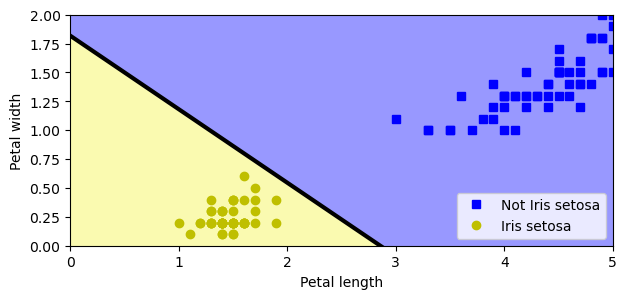

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [10]:
print(rmse)

0.5053326657968172


## Classification MLPS

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
X_train.shape

(55000, 28, 28)

In [13]:
X_train.dtype

dtype('uint8')

In [14]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Ankle boot'

In [17]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

d:\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## *Note: Lấy Weight tại một Layer*

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [22]:
model.get_layer('dense_3') is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00973015, -0.01247468,  0.04403476, ..., -0.04262293,
        -0.05507126, -0.00716657],
       [ 0.06534137,  0.04018585, -0.02921708, ..., -0.04797249,
        -0.04788543, -0.00120708],
       [-0.04905957,  0.06002113, -0.03944461, ..., -0.05009478,
         0.03781427, -0.07046457],
       ...,
       [ 0.06323712,  0.05100392, -0.06138548, ..., -0.05660556,
         0.01089936,  0.00764615],
       [ 0.00693866, -0.05655509, -0.03744044, ...,  0.05961305,
        -0.04029673, -0.05954386],
       [ 0.03754912,  0.00218415, -0.00703122, ..., -0.05333113,
         0.03743975, -0.06803292]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

## Compile model

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

## Training and Evaluating the Model

In [32]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7687 - loss: 0.7040 - val_accuracy: 0.8270 - val_loss: 0.5017
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8302 - loss: 0.4870 - val_accuracy: 0.8430 - val_loss: 0.4483
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8448 - loss: 0.4429 - val_accuracy: 0.8522 - val_loss: 0.4246
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8544 - loss: 0.4156 - val_accuracy: 0.8550 - val_loss: 0.4091
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8612 - loss: 0.3954 - val_accuracy: 0.8576 - val_loss: 0.3972
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8665 - loss: 0.3792 - val_accuracy: 0.8620 - val_loss: 0.3888
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8714 - loss: 0.3656 - val_accuracy: 0.8640 - val_loss: 0.3798
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8751 - loss: 0.3538 - 

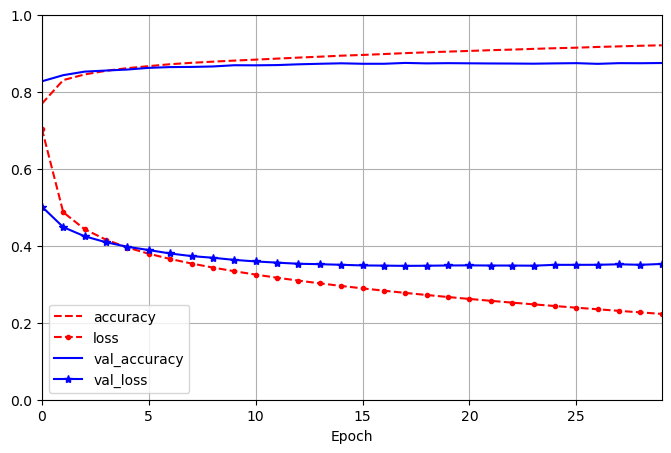

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.3688


[0.3688001036643982, 0.8726000189781189]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.48, 0.  , 0.01, 0.  , 0.51],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Regression MLP using Tensorflow

In [42]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

d:\anaconda\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - RootMeanSquaredError: 2.9284 - loss: 8.5757 - val_RootMeanSquaredError: 2.9006 - val_loss: 8.4134
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8811 - loss: 8.3006 - val_RootMeanSquaredError: 2.8994 - val_loss: 8.4065
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - RootMeanSquaredError: 2.8777 - loss: 8.2813 - val_RootMeanSquaredError: 2.8998 - val_loss: 8.4091
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 2.8763 - loss: 8.2731 - val_RootMeanSquaredError: 2.8984 - val_loss: 8.4010
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8753 - loss: 8.2674 - val_RootMeanSquaredError: 2.8972 - val_loss: 8.3935
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 2.8746 - loss: 8.2636 - val_RootMeanSquaredError: 2.8954 - val_loss: 8.3835
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - RootMeanSquaredError

# Building Complex Models Using the Functional API

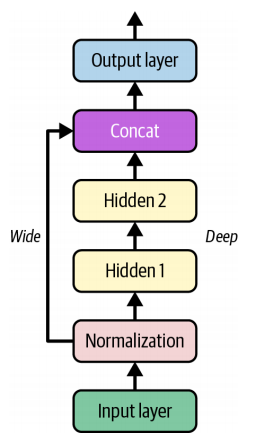

In [43]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])

output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

## Custom Input từ nhiều nguồn

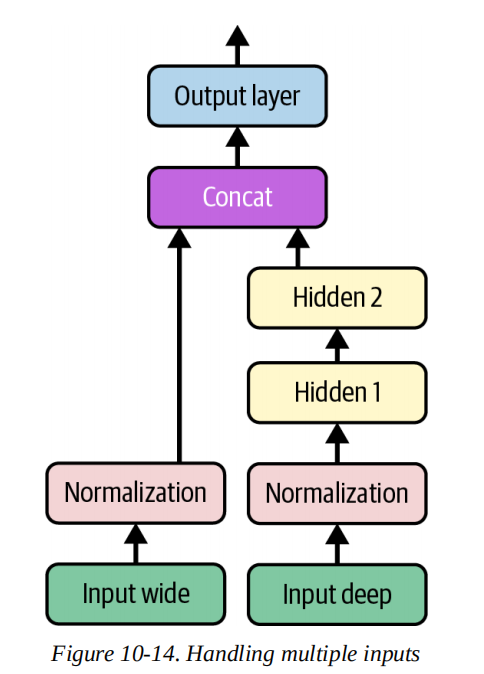

In [56]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [76]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [55]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid)
                    )

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.3738 - loss: 1.8873 - val_RootMeanSquaredError: 0.9067 - val_loss: 0.8222
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7915 - loss: 0.6264 - val_RootMeanSquaredError: 0.9490 - val_loss: 0.9006
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7069 - loss: 0.4997 - val_RootMeanSquaredError: 0.6862 - val_loss: 0.4709
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6657 - loss: 0.4432 - val_RootMeanSquaredError: 0.8209 - val_loss: 0.6740
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6441 - loss: 0.4149 - val_RootMeanSquaredError: 0.7416 - val_loss: 0.5500
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6272 - loss: 0.3934 - val_RootMeanSquaredError: 0.9086 - val_loss: 0.8255
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6184 - los

# Double Output

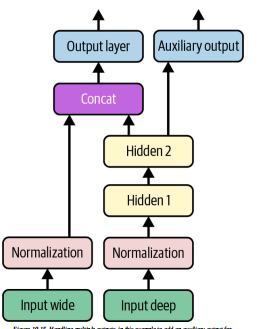

In [64]:
# Ben tren van giu
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep],
                        outputs=[output, aux_output])

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1),
                    optimizer=optimizer,
                    metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_31_RootMeanSquaredError: 1.2219 - dense_31_loss: 1.4927 - dense_32_RootMeanSquaredError: 1.4540 - dense_32_loss: 2.1135 - loss: 1.5552 - val_dense_31_RootMeanSquaredError: 0.8226 - val_dense_31_loss: 0.6766 - val_dense_32_RootMeanSquaredError: 3.2381 - val_dense_32_loss: 10.4803 - val_loss: 1.6576
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_31_RootMeanSquaredError: 0.7203 - dense_31_loss: 0.5190 - dense_32_RootMeanSquaredError: 0.8530 - dense_32_loss: 0.7277 - loss: 0.5398 - val_dense_31_RootMeanSquaredError: 0.6654 - val_dense_31_loss: 0.4427 - val_dense_32_RootMeanSquaredError: 2.5192 - val_dense_32_loss: 6.3431 - val_loss: 1.0331
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_31_RootMeanSquaredError: 0.6696 - dense_31_loss: 0.4485 - dense_32_RootMeanSquaredError: 0.7889 - dense_32_loss: 0.6224 - loss: 0.4658 - val_dense_31_RootMeanSquaredError: 0.6431 - val_dense_31_loss: 0.4134 - val_dense_32_R

In [69]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_31_RootMeanSquaredError: 0.5713 - dense_31_loss: 0.3261 - dense_32_RootMeanSquaredError: 0.6230 - dense_32_loss: 0.3886 - loss: 0.3325


In [70]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [71]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


# Viết Mô hình theo Class

In [ ]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [86]:
tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [87]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [88]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.1262 - RootMeanSquaredError_1: 1.4816 - loss: 1.3610 - mse_loss: 2.1944 - val_RootMeanSquaredError: 0.8285 - val_RootMeanSquaredError_1: 3.7478 - val_loss: 2.0223 - val_mse_loss: 14.0390
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7425 - RootMeanSquaredError_1: 0.8526 - loss: 0.5689 - mse_loss: 0.7268 - val_RootMeanSquaredError: 0.8310 - val_RootMeanSquaredError_1: 1.6490 - val_loss: 0.8935 - val_mse_loss: 2.7181
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6864 - RootMeanSquaredError_1: 0.7571 - loss: 0.4814 - mse_loss: 0.5732 - val_RootMeanSquaredError: 0.6723 - val_RootMeanSquaredError_1: 0.9501 - val_loss: 0.4971 - val_mse_loss: 0.9024
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6543 - RootMeanSquaredError_1: 0.7264 - loss: 0.4381 - mse_loss: 0.5277 - val_RootMeanSquaredError: 0.9004 - val_RootMeanSquaredE

# Lưu mô hình để dùng lại sau

In [89]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [90]:
model.export("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


Saved artifact at 'my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  2388582731600: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2388582731024: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2388582732560: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2388582731984: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2388582737360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2388582738320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2388582738128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2388582738704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2388582738512: TensorSpec(shape=(), dtype=tf.resou

In [91]:
# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model\assets
my_keras_model\fingerprint.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index


In [92]:
tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model")
y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

In [93]:
model.save_weights("my_weights.weights.h5")

In [94]:
model.load_weights("my_weights.weights.h5")

In [95]:
model.save("my_model.keras")

In [96]:
loaded_model = tf.keras.models.load_model(
    "my_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel}
)

# Call Back

In [97]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                    save_weights_only=True)

history = model.fit([...], callbacks=[checkpoint_cb])

ValueError: When using `save_weights_only=True` in `ModelCheckpoint`, the filepath provided must end in `.weights.h5` (Keras weights format). Received: filepath=my_checkpoints

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)
history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])

## Custom CallBack

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

# Viết log khi train

In [100]:
from pathlib import Path
from time import strftime
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")
run_logdir = get_run_logdir()

In [99]:
!pip install -q -U tensorboard-plugin-profile

In [101]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
    )

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6025 - RootMeanSquaredError_1: 0.6536 - loss: 0.3694 - mse_loss: 0.4273 - val_RootMeanSquaredError: 1.4686 - val_RootMeanSquaredError_1: 0.9200 - val_loss: 2.0258 - val_mse_loss: 0.8462
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5896 - RootMeanSquaredError_1: 0.6445 - loss: 0.3543 - mse_loss: 0.4154 - val_RootMeanSquaredError: 0.9311 - val_RootMeanSquaredError_1: 0.6300 - val_loss: 0.8199 - val_mse_loss: 0.3968
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5785 - RootMeanSquaredError_1: 0.6374 - loss: 0.3419 - mse_loss: 0.4063 - val_RootMeanSquaredError: 1.0028 - val_RootMeanSquaredError_1: 1.0641 - val_loss: 1.0184 - val_mse_loss: 1.1320
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5768 - RootMeanSquaredError_1: 0.6347 - loss: 0.3397 - mse_loss: 0.4029 - val_RootMeanSquaredError: 0.9723 - val_RootMeanSquaredEr

In [103]:
!load_ext tensorboard

'load_ext' is not recognized as an internal or external command,
operable program or batch file.


In [104]:
%tensorboard --logdir=./my_logs